# selectivesearch 모듈을 통해 image의 region proposal 시각화
selectivesearch 모듈 사용 
```python
pip install selectivesearch
```
[selectivesearch 관련 github](https://github.com/AlpacaDB/selectivesearch)

## 라이브러리 및 원본이미지 불러오기

이미지 shape :  (2848, 2426, 3)


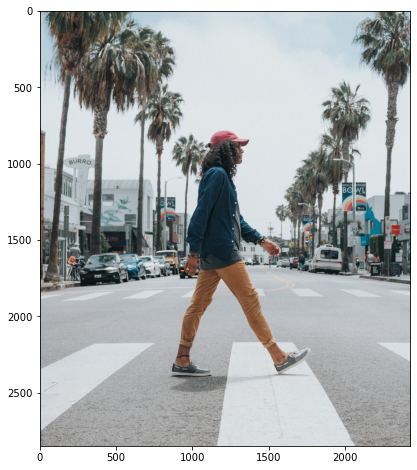

In [4]:
import cv2
import selectivesearch
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('../data/image/walking.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('이미지 shape : ', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(rgb_img)
plt.show()

## selective_search 함수 사용하여 region proposal 계산

In [7]:
# selectivesearch.selective_search() 를 통해 image의 region proposal 정보를 확인할 수 있음. 
_, regions = selectivesearch.selective_search(rgb_img, scale=500, sigma=0.9, min_size=25000)
print(type(regions), len(regions))

<class 'list'> 73


selective_search param 설명  
* scale : 내부 알고리즘을 위한 파라미터 값 [Efficient Graph-Based Image Segmentation](http://cs.brown.edu/people/pfelzens/papers/seg-ijcv.pdf) 논문에서 사용된 k 값을 의미하는 듯 함. 어떤 크기의 object 를 검출할 것인지 판단하는 알고리즘의 파라미터 값으로 보임.
* min_size : proposal 할 바운딩박스의 최소 크기
* sigma : Gaussian filter 의 값을 나타내는 듯하며 default 값은 0.8

selective_search 는 return 값으로 Region Proposal(이미지의 객체 후보 영역) 의 정보가 담긴 list 를 반환함.

In [20]:
regions[0:5]

[{'rect': (0, 0, 162, 1438), 'size': 165176, 'labels': [0.0]},
 {'rect': (0, 0, 885, 1778), 'size': 473659, 'labels': [1.0]},
 {'rect': (488, 0, 467, 816), 'size': 66027, 'labels': [2.0]},
 {'rect': (597, 0, 1678, 1752), 'size': 1519369, 'labels': [3.0]},
 {'rect': (2032, 0, 245, 599), 'size': 47975, 'labels': [4.0]}]

In [23]:
print(regions[-2:])

[{'rect': (0, 0, 2425, 2174), 'size': 4226358, 'labels': [13.0, 26.0, 5.0, 11.0, 17.0, 18.0, 24.0, 4.0, 29.0, 30.0, 12.0, 25.0, 1.0, 2.0, 6.0, 10.0, 16.0, 15.0, 20.0, 22.0, 21.0, 0.0, 8.0, 19.0, 27.0, 9.0, 14.0, 3.0, 7.0]}, {'rect': (0, 0, 2425, 2847), 'size': 6909248, 'labels': [13.0, 26.0, 5.0, 11.0, 17.0, 18.0, 24.0, 4.0, 29.0, 30.0, 12.0, 25.0, 1.0, 2.0, 6.0, 10.0, 16.0, 15.0, 20.0, 22.0, 21.0, 0.0, 8.0, 19.0, 27.0, 9.0, 14.0, 3.0, 7.0, 34.0, 35.0, 32.0, 36.0, 33.0, 28.0, 31.0, 23.0]}]


Region Proposal 에 대한 정보가 regions 이라는 변수에 list 형태로 담겨 return 됨.  
list 의 각 원소로 후보영역에 대한 정보의 값이 dict 형태로 저장되어 있음.  
* rect : 각각 (x(좌상단), y(좌상단) , width, height)를 의미를 가지며 해당 좌표를 그렸을 때 bounding box를 의미
* size : 내부 알고리즘이 판단한 pixel 의 segmentation 영역으로 추정됨
* labels : Bounding box 내에 있는 object들의 고유 ID

아래로 내려갈 수록 width, height 값이 큰 bounding box 를 나타내며, 이들 box 안에 여러개의 object 가 존재하기도 함.  
```python 
# 해당 bounding box 에는 12, 25, 1 번 object 가 포함됨.
 {'rect': (0, 0, 885, 1800), 'size': 624331, 'labels': [12.0, 25.0, 1.0]},
```

In [11]:
# rect 값들만 리스트로 
rects = [region['rect'] for region in regions]
print(rects)

[(0, 0, 162, 1438), (0, 0, 885, 1778), (488, 0, 467, 816), (597, 0, 1678, 1752), (2032, 0, 245, 599), (2168, 0, 257, 701), (269, 153, 330, 254), (2257, 344, 168, 1226), (155, 406, 208, 623), (405, 495, 266, 667), (703, 528, 228, 374), (1846, 530, 312, 452), (168, 623, 359, 1177), (2066, 645, 279, 1095), (667, 676, 104, 806), (1045, 785, 321, 745), (851, 798, 241, 275), (1582, 802, 458, 748), (1723, 920, 457, 809), (117, 932, 240, 837), (920, 971, 481, 841), (385, 975, 262, 614), (786, 1083, 160, 499), (1276, 1248, 1149, 1170), (1507, 1280, 318, 412), (391, 1428, 289, 178), (2246, 1474, 179, 293), (291, 1529, 434, 235), (0, 1634, 1115, 744), (1146, 1652, 375, 522), (918, 1691, 264, 477), (975, 1750, 463, 663), (1227, 2007, 331, 389), (0, 2171, 753, 676), (1554, 2200, 871, 647), (1073, 2201, 1239, 646), (5, 2269, 1218, 578), (1582, 530, 576, 1020), (2066, 645, 359, 1122), (703, 528, 389, 545), (0, 1634, 1438, 779), (1507, 920, 673, 809), (2066, 0, 359, 1767), (269, 0, 686, 816), (1582, 0

## Bounding box 시각화

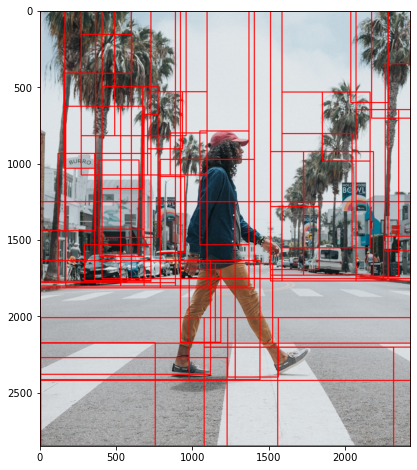

In [24]:
# opencv 를 활용하여 region proposal 된 영역들을 rectangle 을 이용하여 시각화

# retangle color 설정
red_color = (255, 0, 0)
# 원본 img copy()
rp = rgb_img.copy()

# 각 region의 rect값들이 저장된 리스트를 이용해 region별 rectangle 을 그림
for rect in rects:
    # 좌상단 좌표
    x1 = rect[0]
    y1 = rect[1]
    # 우하단 좌표 (좌상단 좌표에 각각 width, height 더해줌)
    x2 = x1 + rect[2]
    y2 = y1 + rect[3]
    
    cv2.rectangle(rp, (x1, y1), (x2, y2), color=red_color, thickness=5)
    
plt.figure(figsize=(8, 8))
plt.imshow(rp)
plt.show()

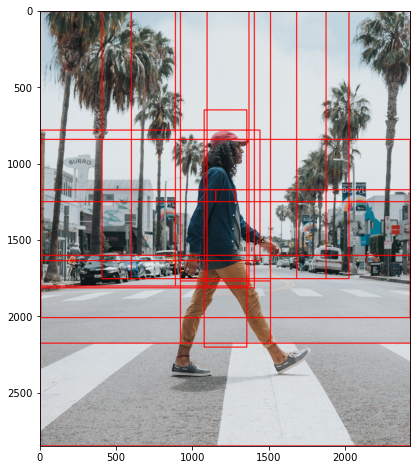

In [27]:
# bounding box 의 크기가 500000 이상인 것들만 그리기
rects = [region['rect'] for region in regions if region['size'] >  500000]

red_color = (255, 0, 0)
rp = rgb_img.copy()
for rect in rects:
    x1 = rect[0]
    y1 = rect[1]
    x2 = rect[2]
    y2 = rect[3]
    
    cv2.rectangle(rp, (x1, y1), (x2, y2), color=red_color, thickness=5)
    
plt.figure(figsize=(8, 8))
plt.imshow(rp)
plt.show()